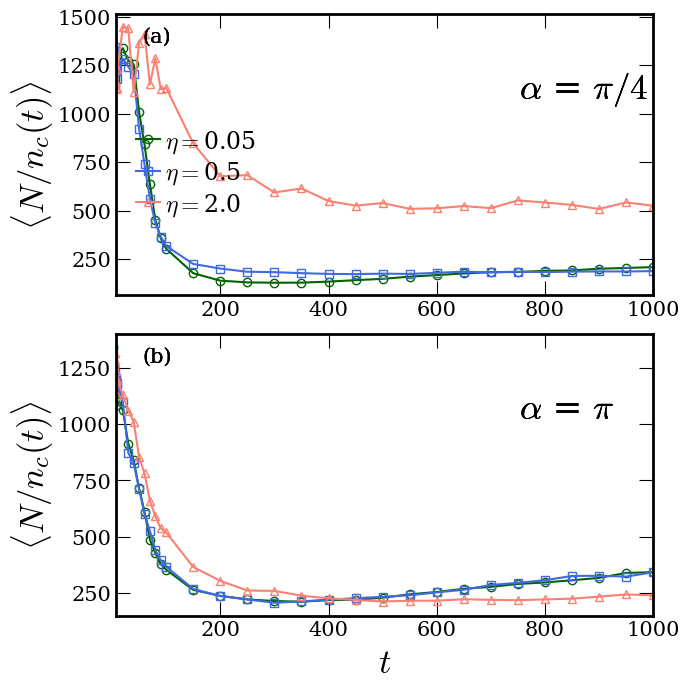

In [ ]:
#inverse avg cluster  number vs t 
import matplotlib.pyplot as plt
import numpy as np
import glob
from itertools import product
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib

current_directory = os.getcwd()

#matplotlib.use('Qt5Agg')

# Parameters
noises=[0.05,0.5,2]
angles=[45, 180]
detail=[]
with open(current_directory+f'/Angle_{angles[0]}/Noise_{noises[0]}/parameters.txt', 'r') as file:
    for line in file:
        detail.append(line)
Length_of_box = float(detail[1])   # Size of the grid
numberoftrials=int(detail[10])
maxiter=int(detail[3])
Number_of_agents=int(detail[0])
Lx=int(detail[1])
Ly=float(detail[2])
v0=float(detail[4])
dt=float(detail[5])
density=float(detail[8])
rc=float(detail[9])


numberoftimesteps=0
for i in range( maxiter):
    if(i<10):tf=1
    if(i>10):tf=10
    if(i>100):tf=50
    if(i>1000):tf=100
    if(i%tf==0):numberoftimesteps+=1

numberofnoises=len(noises)
numberofangles=len(angles)

plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams["legend.labelspacing"]=0.1
#plt.rc_context({"xtick.major.pad": 8})
#plt.rc_context({"ytick.major.pad": 5})
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
#plt.rc('legend',fontsize=30)
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] ="cm"
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
#plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
#plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.major.size'] = 10
#plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
#plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams["legend.handlelength"] = 1.0
plt.rcParams["legend.handletextpad"] = 0.2

plt.rcParams["legend.frameon"]=False 
plt.rcParams["legend.loc"]="lower right"

fig, axes = plt.subplots(2, figsize=(7, 7))


# Function to load data from files
def load_data(file_path):
    order = []
    time = []
    try:
        with open(file_path, 'r') as file:
            for line in file:
                o = map(float, line.split())
                order.append(o)
                
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None

    return order

colour=['darkgreen','royalblue','salmon']
markers=["o","s","^"]
label=["(a)","(b)","(c)","(d)"]

angles_rad=[r"$\pi/4$",r"$\pi$"]
noises_str=["0.05","0.5","2.0"]

times=[]
for t in range(maxiter):
    if(t<10):tf=1
    if(t>10):tf=10
    if(t>100):tf=50
    if(t>1000):tf=100
    if(t%tf==0):
        times.append(t)

# Loop through different trials to read data and create quiver plots
for j in range(0,numberofangles): 
    for i in range(0,numberofnoises):
        number=np.zeros(len(times))
        for trial in range(numberoftrials):
            for t,tim in enumerate(times):
                # Path templates
                path = current_directory+f'/Angle_{angles[j]}/Noise_{noises[i]}/cluster_index/mass_{trial}_{tim}_.txt'
                # Load data
                o = load_data(path)
                if(len(o)!=0):
                    number[t]+=Number_of_agents/float(len(o))
        number/=numberoftrials

        # Plot
        ax = axes[j] 

        if(j==0):
            ax.plot(times,number, c=colour[i], marker=markers[i],label=r"$\eta =$"+f"{noises_str[i]}", markeredgecolor=colour[i],markerfacecolor="None")
            ax.legend( prop={'size': 17},labelspacing = 0.2,frameon=False,bbox_to_anchor=(0.1, 0.2, 0.2, 0.6))
           
        else:
            ax.plot(times,number, c=colour[i], marker=markers[i], markeredgecolor=colour[i],markerfacecolor="None")
 
            
        ax.annotate( r"$\alpha$ = " + f'{angles_rad[j]}',size=25,xy=(0.75,0.7),xycoords="axes fraction")
        ax.annotate(label[j],size=15,xy=(0.05,0.9),xycoords="axes fraction")
    
        if(j==1):
            ax.set_xlabel(r'$t$',fontsize=25)
        if(i==0):
            ax.set_ylabel(r'$\langle N/n_c(t) \rangle$',fontsize=25,labelpad=1)
        
        ax.title.set_position((0.15, 0.9))
        #ax.set_ylim(0,1.05)
        ax.set_xlim(7,9000)
        ax.set_xscale("log")
        #ax.set_yscale("log")
        ax.tick_params(axis='x', which='minor')
        ax.tick_params(left=True, top=True ,right=True)
        ax.tick_params(axis="x", direction="in")
        ax.tick_params(axis="y", direction="in")

ax=axes[0]
#props = dict(boxstyle='round', facecolor='None', alpha=0.2)
#string=f"$N=${Number_of_agents} \n"+"$L=$"+f"{Lx} "
#ax.text(0.2,0.9,string,transform=ax.transAxes,fontsize=13,verticalalignment='top',bbox=props)

#for ticks 
ax1=axes[0]
ax2=axes[1]


#ax1.xaxis.set_major_locator(MultipleLocator(2500))
#ax1.xaxis.set_minor_locator(MultipleLocator(1250))
#ax1.yaxis.set_major_locator(MultipleLocator(4))
#ax1.yaxis.set_minor_locator(MultipleLocator(2))
#ax1.set_ylim(0,22)
ax1.tick_params(which='minor', direction="in", length=4, color="black",right=True,top=True)

#ax2.xaxis.set_major_locator(MultipleLocator(2500))
#ax2.xaxis.set_minor_locator(MultipleLocator(1250))
#ax2.yaxis.set_major_locator(MultipleLocator(2))
#ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.tick_params(which='minor', direction="in", length=4, color="black",right=True,top=True)


plt.tight_layout()
plt.show()


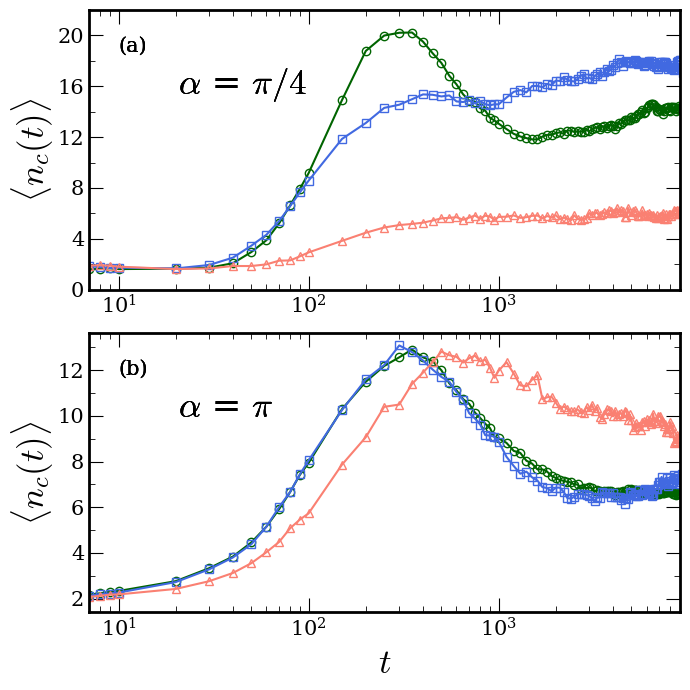

In [8]:
#
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams

current_directory = os.getcwd()


#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = [r'\usepackage{lmodern}'] 
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams["legend.labelspacing"]=0.1
#plt.rc_context({"xtick.major.pad": 8})
#plt.rc_context({"ytick.major.pad": 5})
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
#plt.rc('legend',fontsize=30)
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] ="cm"
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
#plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
#plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.major.size'] = 10
#plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
#plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams["legend.handlelength"] = 1.0
plt.rcParams["legend.handletextpad"] = 0.2



# Function to load data from files
def load_data(path):
    data = []
    try:
        with open(path, 'r') as f:
            for line in f:
                data.append(float(line.strip()))
    except FileNotFoundError:
        print(f"Warning: File not found: {path}. Generating dummy data for demonstration.")
    except ValueError:
        print(f"Error: Invalid data (non-numeric) in file: {path}. Skipping this file.")
        return None
    return np.array(data)

# Define simulation parameters and constants
angles=["45","90","120","180"]
angles_rad=[r"$\pi/4$",r"$\pi/2$",r"$2\pi/3$",r"$\pi$"] # LaTeX formatted angles for labels
noises=["1","0.5","0.05"]
number_of_trials=100
times=[4000,5000,6000,7000]
alpha_scaling = 1.5
length_factors = [1.82**(-alpha_scaling), 3.41**(-alpha_scaling), 9.33**(-alpha_scaling), 19.75**(-alpha_scaling)]


# Set a visually appealing style for Seaborn plots
sns.set_theme(style="dark", palette="deep") # 'whitegrid' provides a grid, 'deep' is a good default color palette
sns.set_context("paper")
sns.set_palette("colorblind")

# Create a figure and two subplots (axes) to display the plots side-by-side
# Increased figure size for better readability of two plots
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5)) 

# --- Plot 1: Mass Distribution for Different Noises (Fixed Angle = 180) ---
# This loop iterates through different noise levels to plot their mass distributions.
for j, current_noise in enumerate(noises):
    avgmass = []
    for current_trial in range(number_of_trials):
        for t, current_time in enumerate(times):
            # Construct the file path for the mass data for the current trial, time, and noise
            path_template_mass = os.path.join(current_directory, f'Angle_180', f'Noise_{current_noise}', 'cluster_index', f'mass_{current_trial}_{current_time}_.txt')
            mass = load_data(path_template_mass)
            if mass is not None:
                avgmass.append(mass)

    if avgmass: 
        # Concatenate all mass arrays and flatten them into a single array
        avg = np.concatenate(avgmass).flatten()
        frequency, bin_edges = np.histogram(avg, bins=50)
        x_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:]) # Calculate the center of each bin
        frequency = frequency.astype(float)
        frequency /= frequency.sum() # Normalize the frequency so that the sum of all frequencies is 1
        sns.lineplot(x=x_centers, y=frequency, ax=axes[0], label=r"$\eta =$" + current_noise, linewidth=2)

# --- Plot 2: Mass Distribution for Different Angles (Fixed Noise = 0.5) ---

# This loop iterates through different angles to plot their mass distributions.
for j, current_angle in enumerate(angles):
    avgmass = []
    for current_trial in range(number_of_trials):
        for t, current_time in enumerate(times):
            # Construct the file path for the mass data for the current trial, time, and angle
            path_template_mass = os.path.join(current_directory, f'Angle_{current_angle}', f'Noise_0.5', 'cluster_index', f'mass_{current_trial}_{current_time}_.txt')
            mass = load_data(path_template_mass)
            if mass is not None:
                avgmass.append(mass)
    
    if avgmass:
        # Concatenate all mass arrays and flatten them
        avg = np.concatenate(avgmass).flatten()
        
        # Calculate the histogram manually
        frequency, bin_edges = np.histogram(avg, bins=50)
        x_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        
        frequency = frequency.astype(float)
        frequency /= frequency.sum() # Normalize frequency

        # Apply the specific scaling factor from `length_factors` as in the original code
        frequency_scaled = frequency * length_factors[j]
        
        # Write the unscaled frequency data to a file, as per the original script
        with open(f"hist_{current_angle}.txt","w") as file:
            for i, f_val in enumerate(frequency): # Note: original writes unscaled frequency
                file.write(f"{x_centers[i]} {f_val} \n")

        # Use Seaborn's `lineplot` to plot the scaled histogram data
        sns.lineplot(x=x_centers, y=frequency_scaled, ax=axes[1], label=r"$\alpha =$" + angles_rad[j], linewidth=1.5)


#********************************Customise*******************************************************

# First subplot

#axes[0].set_title(r'Avg. cluster mass Distribution for $\alpha = \pi$', fontsize=16)
axes[0].set_xlabel('Avg. Cluster Mass', fontsize=14)
axes[0].set_ylabel('Normalized Frequency (log)', fontsize=14)
axes[0].set_ylim(0.0005, 1) # Set Y-axis limits, adjusted for log scale visibility
#axes[0].set_xscale("log") # Set X-axis to logarithmic scale
axes[0].set_yscale("log") # Set Y-axis to logarithmic scale
axes[0].legend( fontsize=12, title_fontsize=13)
axes[0].tick_params(left=True, top=True ,right=True)
axes[0].tick_params(axis="x", direction="in")
axes[0].tick_params(axis="y", direction="in")
axes[0].xaxis.set_major_locator(MultipleLocator(500))
axes[0].xaxis.set_minor_locator(MultipleLocator(100))
#axes[0].yaxis.set_major_locator(MultipleLocator(0.00))
#axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
axes[0].tick_params(which='minor', direction="in", length=4, color="black",right=True,top=True)
axes[0].tick_params(which='minor', direction="in", length=2, color="black",left=True,bottom=True,right=True,top=True)
axes[0].tick_params(which='major', direction="in", length=4, color="black",left=True,bottom=True,right=True,top=True)

# Add an annotation within the plot, similar to the original code
axes[0].annotate(r"$\alpha =\pi$", size=16, xy=(0.45, 0.9), xycoords="axes fraction")


# Second subplot

#axes[1].set_title(r'Mass Distribution for $\eta = 0.5$', fontsize=16)
axes[1].set_xlabel('Avg. Cluster Mass', fontsize=14)
#axes[1].set_ylabel('Scaled Normalized Frequency', fontsize=14)
#axes[1].set_xscale("log") # Set X-axis to logarithmic scale
axes[1].set_yscale("log") # Set Y-axis to logarithmic scale
#axes[1].legend(title=r'Angle ($\alpha$)', fontsize=12, title_fontsize=13)
axes[1].legend( fontsize=12, title_fontsize=13)
axes[1].annotate(r"$\eta = 0.5$", size=16, xy=(0.4, 0.9), xycoords="axes fraction")
axes[1].tick_params(left=True, top=True ,right=True)
axes[1].tick_params(axis="x", direction="in")
axes[1].tick_params(axis="y", direction="in")
axes[1].xaxis.set_major_locator(MultipleLocator(100))
axes[1].xaxis.set_minor_locator(MultipleLocator(50))
#axes[1].yaxis.set_major_locator(MultipleLocator(0.2))
#axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
axes[1].tick_params(which='minor', direction="in", length=2, color="black",left=True,bottom=True,right=True,top=True)
axes[1].tick_params(which='major', direction="in", length=4, color="black",left=True,bottom=True,right=True,top=True)


# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()



qt.qpa.wayland: Wayland does not support QWindow::requestActivate()
